## Introduction

### Machine learning model to predict if the user would buy the product in the next 3 months or not based on the user's past activities and user-level information

### Import the necessary packages.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import train and test dataset

In [ ]:
train=pd.read_csv("/content/gdrive/MyDrive/AV_job-a-thon-june-2022/train_wn75k28.csv")
test=pd.read_csv("/content/gdrive/MyDrive/AV_job-a-thon-june-2022/test_Wf7sxXF.csv")

### Structure of the train and test dataset.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

#### The above information shows that there are 39161 data entries and 19 columns.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

#### The above information shows that there are 13184 data entries and 18 columns.

### Let's see is there any missing values in train and test dataset by column wise.

In [ ]:
train.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [ ]:
train.columns[train.isnull().any()]

Index(['products_purchased', 'signup_date'], dtype='object')

#### The above information shows that there are missing values in the products_purchased, signup_date columns.

In [ ]:
test.isnull().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

In [ ]:
test.columns[test.isnull().any()]

Index(['products_purchased', 'signup_date'], dtype='object')

#### The above information shows that there are missing values in the products_purchased, signup_date columns.

### Let's see the glimpse of train dataset

In [ ]:
train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


### Let's create a function to display the catgeorical column level counts.

In [ ]:
def count_plot(df,col,rot=None,title=''):
  _=plt.figure(figsize=(8,6))
  _=sns.countplot(x=df[col],order=df[col].value_counts().index);
  _=plt.title(title,fontsize=25)
  _=plt.xlabel(col,fontsize=20)
  _=plt.xticks(fontsize=14,rotation=rot)

### Let's create a function to display the group by catgeorical column level counts.

In [ ]:
def grp_count_plot(df,col,grp,rot=None,title=''):
  _=plt.figure(figsize=(8,6))
  _=sns.countplot(x=df[col],hue=df[grp],order=df[col].value_counts().index );
  _=plt.title(title,fontsize=25)
  _=plt.xlabel(col,fontsize=20)
  _=plt.xticks(fontsize=14,rotation=rot)

### Let's explore the target column(**buy**) distribution.The target column describes user's intent to buy the product on the website.

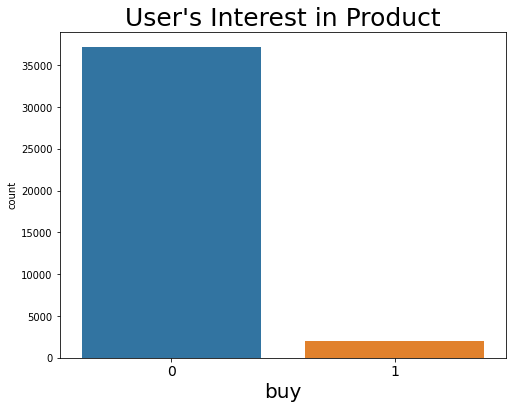

In [ ]:
count_plot(train,'buy',title="User's Interest in Product")

In [ ]:
train.groupby(['buy'])['buy'].agg({'count'}).assign(percentage=lambda x:round(x['count']*100/x['count'].sum(),2))

,count,percentage
buy,,
0,37163,94.9
1,1998,5.1


#### The above bar plot explains that the target column is imbalanced.

#### In 37163 of customers there is only 5.1%(1998) of users will buy the products in the next three months.

### Let's see which type of marketing campaign attracts the user.

### Let's see the type 1 marketing campaigning 

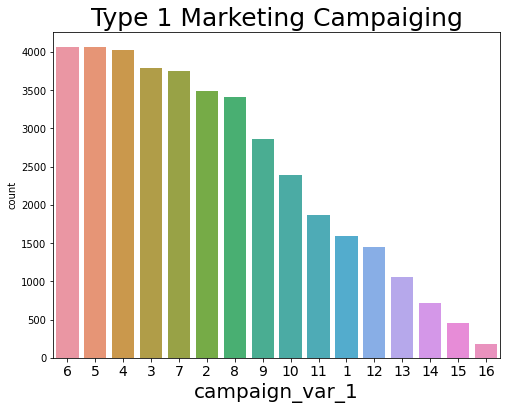

In [ ]:
count_plot(train,'campaign_var_1',title='Type 1 Marketing Campaiging')

In [ ]:
train.groupby(['campaign_var_1'])['campaign_var_1'].agg({'count'}).assign(percentage=lambda x:round(x['count']*100/x['count'].sum(),2)).sort_values('percentage',ascending=False)

,count,percentage
campaign_var_1,,
5,4060,10.37
6,4061,10.37
4,4018,10.26
3,3784,9.66
7,3756,9.59
2,3486,8.90
8,3407,8.70
9,2866,7.32
10,2392,6.11


#### The above plot explains that D2C startup is used the 4, 5, and 6 types of marketing campaigning to more than 4000 users.

### User's  interest in the product by type 1 marketing campaign

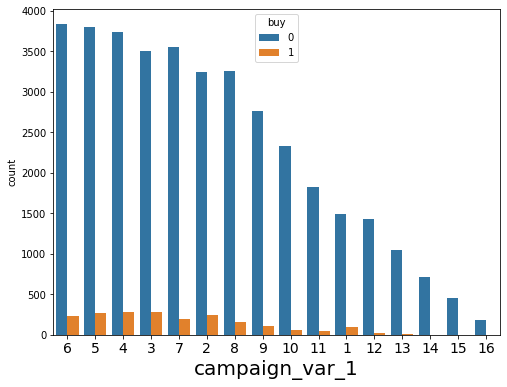

In [ ]:
grp_count_plot(train,col='campaign_var_1',grp='buy')

In [ ]:
train.groupby(['campaign_var_1','buy'])['buy'].agg({'count'}).assign(percentage=lambda x:round(x['count']*100/x['count'].sum(),2)).reset_index().query('buy==1').sort_values('percentage',ascending=False)

,campaign_var_1,buy,count,percentage
7,4,1,277,0.71
5,3,1,276,0.70
9,5,1,267,0.68
3,2,1,249,0.64
11,6,1,228,0.58
13,7,1,199,0.51
15,8,1,152,0.39
17,9,1,103,0.26
1,1,1,97,0.25
19,10,1,61,0.16


In [ ]:
train.groupby(['campaign_var_1','buy'])['buy'].agg({'count'}).assign(percentage=lambda x:round(x['count']*100/x['count'].sum(),2)).reset_index().query('buy==0').sort_values('percentage',ascending=False)

,campaign_var_1,buy,count,percentage
10,6,0,3833,9.79
8,5,0,3793,9.69
6,4,0,3741,9.55
12,7,0,3557,9.08
4,3,0,3508,8.96
14,8,0,3255,8.31
2,2,0,3237,8.27
16,9,0,2763,7.06
18,10,0,2331,5.95
20,11,0,1825,4.66


#### The above plot and summary explain that type 1 marketing campaigns 2, 3, 4, 5, 6, and 7 attract more than 0.5 percent of users to buy the product.

#### Type 1 marketing campaigns 12, 13, 14, and 15 attract less than 0.1 percent of users to buy the product.

#### Type 1 marketing campaign 16 failed to attract the users to buy the product.



### Let's see the type 2 marketing campaigning 

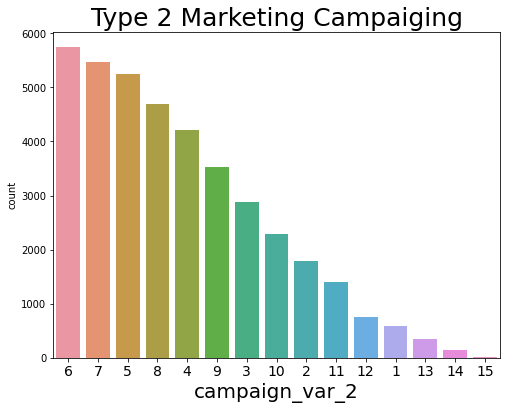

In [ ]:
count_plot(train,'campaign_var_2',title='Type 2 Marketing Campaiging')

In [ ]:
train.groupby(['campaign_var_2'])['campaign_var_2'].agg({'count'}).assign(percentage=lambda x:round(x['count']*100/x['count'].sum(),2)).sort_values('percentage',ascending=False)

,count,percentage
campaign_var_2,,
6,5744,14.67
7,5472,13.97
5,5250,13.41
8,4690,11.98
4,4213,10.76
9,3537,9.03
3,2883,7.36
10,2298,5.87
2,1788,4.57


#### The above plot explains that D2C startup is used the 4, 5, 6, 7, and 8 types of marketing campaigning to more than 4000 users.

### User's  interest in the product by type 2 marketing campaign

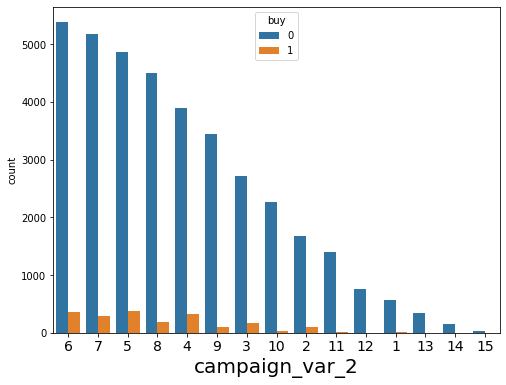

In [ ]:
grp_count_plot(train,col='campaign_var_2',grp='buy')

In [ ]:
train.groupby(['campaign_var_2','buy'])['buy'].agg({'count'}).assign(percentage=lambda x:round(x['count']*100/x['count'].sum(),2)).reset_index().query('buy==1').sort_values('percentage',ascending=False)

,campaign_var_2,buy,count,percentage
9,5,1,380,0.97
11,6,1,365,0.93
7,4,1,328,0.84
13,7,1,293,0.75
15,8,1,189,0.48
5,3,1,170,0.43
3,2,1,104,0.27
17,9,1,102,0.26
19,10,1,34,0.09
1,1,1,22,0.06


In [ ]:
train.groupby(['campaign_var_2','buy'])['buy'].agg({'count'}).assign(percentage=lambda x:round(x['count']*100/x['count'].sum(),2)).reset_index().query('buy==0').sort_values('percentage',ascending=False)

,campaign_var_2,buy,count,percentage
10,6,0,5379,13.74
12,7,0,5179,13.22
8,5,0,4870,12.44
14,8,0,4501,11.49
6,4,0,3885,9.92
16,9,0,3435,8.77
4,3,0,2713,6.93
18,10,0,2264,5.78
2,2,0,1684,4.30
20,11,0,1403,3.58


#### The above plot and summary explain that type 2 marketing campaigns 4, 5, 6, and 7 attract more than 0.5 percent of users to buy the product.

#### Type 2 marketing campaigns 1, 10, 11, and 12 attract less than 0.1 percent of users to buy the product.

#### Type 2 marketing campaigns 14 and 15 failed to attract the users to buy the product.



### Let's see the number of products purchased by the user in past.

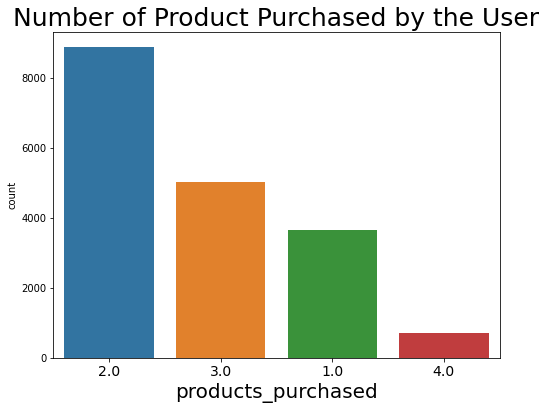

In [ ]:
count_plot(train,'products_purchased',title='Number of Product Purchased by the User')

In [ ]:
train.groupby(['products_purchased'])['products_purchased'].agg({'count'}).assign(percentage=lambda x:round(x['count']*100/x['count'].sum(),2)).sort_values('percentage',ascending=False)

,count,percentage
products_purchased,,
2.0,8867,48.59
3.0,5024,27.53
1.0,3643,19.96
4.0,716,3.92


#### The above bar plot explains that most users purchased 2 products in past.

### Let's see the user's interest in the product based on the number of products they purchased before.

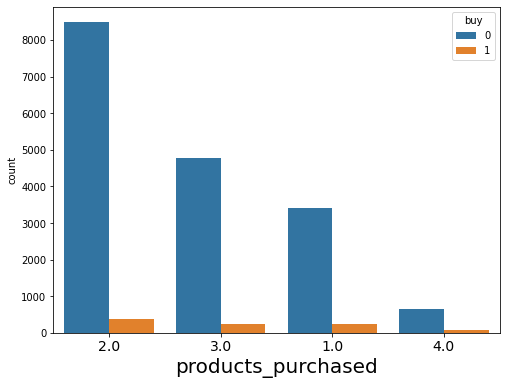

In [ ]:
grp_count_plot(train,'products_purchased',grp='buy')

In [ ]:
train.groupby(['products_purchased','buy'])['buy'].agg({'count'}).assign(percentage=lambda x:round(x['count']*100/x['count'].sum(),2)).reset_index().query('buy==1').sort_values('percentage',ascending=False)

,products_purchased,buy,count,percentage
3,2.0,1,383,2.10
5,3.0,1,254,1.39
1,1.0,1,242,1.33
7,4.0,1,74,0.41


In [ ]:
train.groupby(['products_purchased','buy'])['buy'].agg({'count'}).assign(percentage=lambda x:round(x['count']*100/x['count'].sum(),2)).reset_index().query('buy==0').sort_values('percentage',ascending=False)

,products_purchased,buy,count,percentage
2,2.0,0,8484,46.49
4,3.0,0,4770,26.14
0,1.0,0,3401,18.64
6,4.0,0,642,3.52


#### The above plot and summary explain that the users who have purchased 2 products in past, will be purchasing the product on the website in the 3 next months.

#### The users who have purchased 4 products in past, will be purchasing the products on the website in the next 3 months but their count will be low. 

### Let's see users' various activities on the website and their interest in the product.

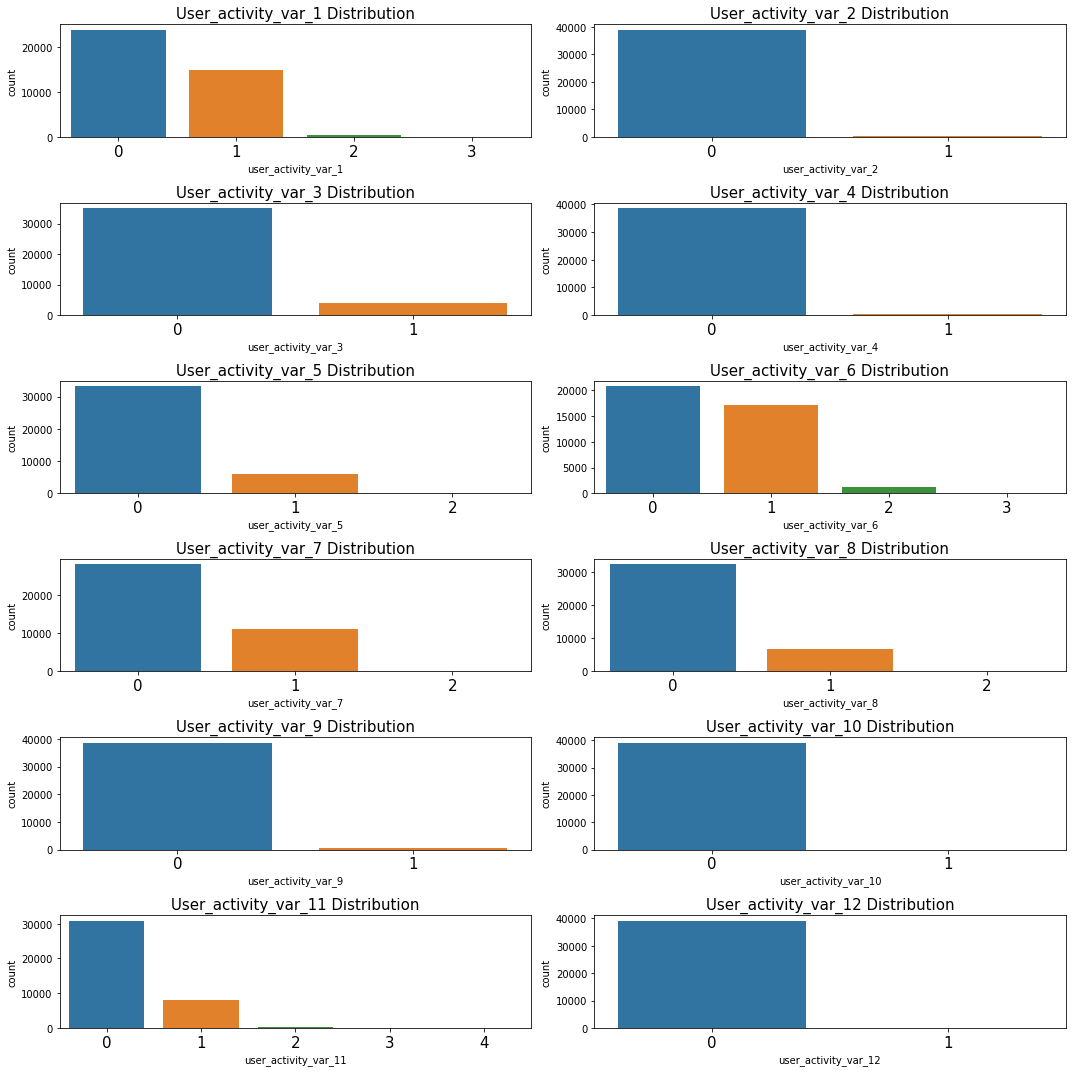

In [ ]:
fig=plt.subplots(figsize=(15, 15))
for i,col  in enumerate(train.iloc[:,6:18].columns.values):    
  _=plt.subplot(6,2,i+1)
  _=sns.countplot(x=train[col])
  _=plt.title(col.capitalize()+' Distribution',fontsize=15)
  _=plt.xlabel(col,fontsize=10)
  _=plt.xticks(fontsize=15)
  _=plt.tight_layout()  
plt.show()  

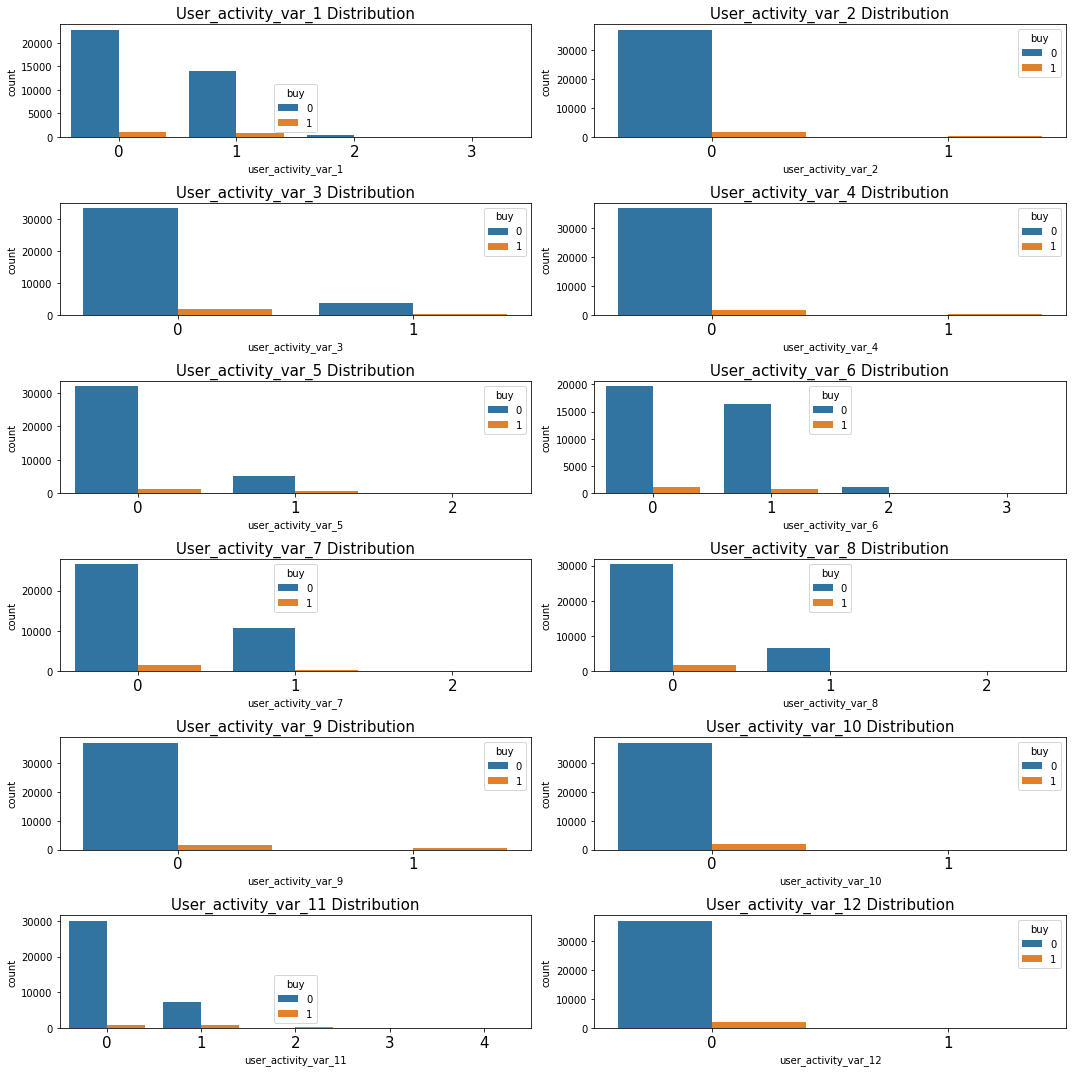

In [ ]:
fig=plt.subplots(figsize=(15, 15))
for i,col  in enumerate(train.iloc[:,6:18].columns.values):    
  _=plt.subplot(6,2,i+1)
  _=sns.countplot(x=train[col],hue=train['buy'])
  _=plt.title(col.capitalize()+' Distribution',fontsize=15)
  _=plt.xlabel(col,fontsize=10)
  _=plt.xticks(fontsize=15)
  _=plt.tight_layout()  
plt.show()  

#### There are two date columns in the dataset. The lead created data and user signup date.

#### Let's convert these date columns to date format and apply some feature engineering.

In [6]:
def date_feature_eng(df):
  df['date_time']=pd.to_datetime(df["created_at"].astype('str')) #convert to date-time format
  df['date_time2']=pd.to_datetime(df["signup_date"].astype('str')) #convert to date-time format
  df['day']=df['date_time'].dt.day #extract day from the date
  df['day_label']=df['date_time'].dt.day_name() #extract the day name from the date
  df['day_number']=df['date_time'].dt.dayofweek #extract the day number from the date
  df['month_number']=df['date_time'].dt.month #extract month number from the date
  df['month_label']=df['date_time'].dt.strftime('%b') #extract the month name from the date
  df['year_quarter']=df['date_time'].dt.quarter #extract the quarter of the year
  df['week_of_year']=df['date_time'].dt.week #extract week of the year from date
  df['year']= df['date_time'].dt.year #extract year
  df['dayofmonth'] = df['date_time'].dt.daysinmonth #extract the day of the month
  df['dayofyear'] = df['date_time'].dt.day_of_year #extract day of the year
  df['weekday']=df['date_time'].dt.day_name().isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']).astype('int') #create weekday column
  df['weekend']=df['date_time'].dt.day_name().isin(['Saturday', 'Sunday']).astype('int') #create weekend column
  df['month_start']=df['date_time'].dt.is_month_start.astype('int') #create month start
  df['month_end']=df['date_time'].dt.is_month_end.astype('int') #create month end
  df['quarter_start']=df['date_time'].dt.is_quarter_start.astype('int') #create quarter start
  df['quarter_end']=df['date_time'].dt.is_quarter_end.astype('int') #create quarter end
  df['year_start']=df['date_time'].dt.is_year_start.astype('int') #create year start
  df['year_end']=df['date_time'].dt.is_year_end.astype('int') #create year end
  return df

### Apply the feature engineering steps to date columns.

In [7]:
train=date_feature_eng(train)

### Let's see the users' interest in the product on the website changes over time based on their signup information.

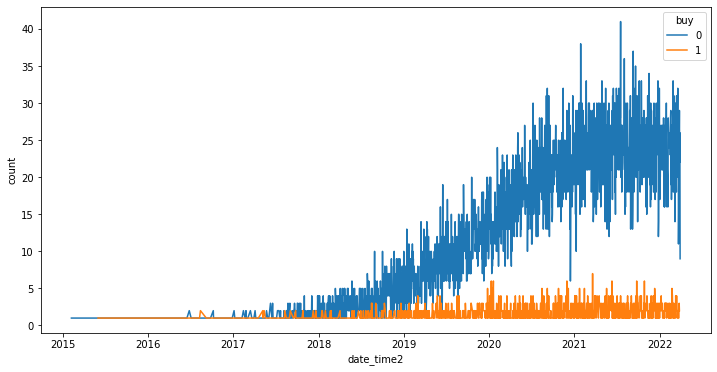

In [15]:
_=plt.figure(figsize=(12,6))
sns.lineplot(data=train.groupby(['date_time2','buy'])['buy'].agg({'count'}).reset_index(),
             x='date_time2',y='count',hue='buy');

### Let's see after creating the lead how users' interest in the product on the website changes over time based on the lead created date.

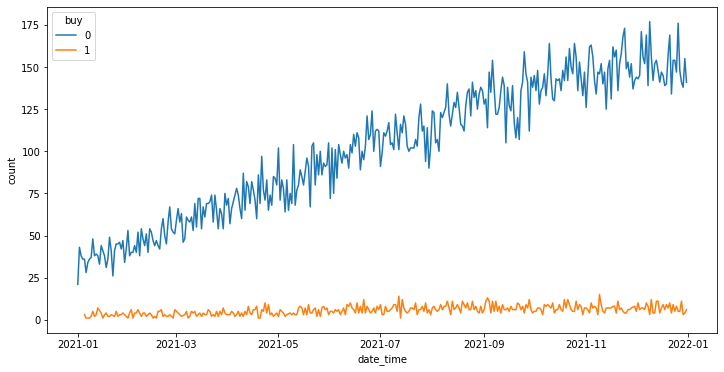

In [17]:
_=plt.figure(figsize=(12,6))
sns.lineplot(data=train.groupby(['date_time','buy'])['buy'].agg({'count'}).reset_index(),
             x='date_time',y='count',hue='buy');

#### The above line plot explains the not-interested users count in the product on the website is increasing each year.

#### Interested users count in the product on the website is not much changed over the year.

### Let's see how users' interest in the product on the website changes over time based on the lead created date and type 1 campaign.

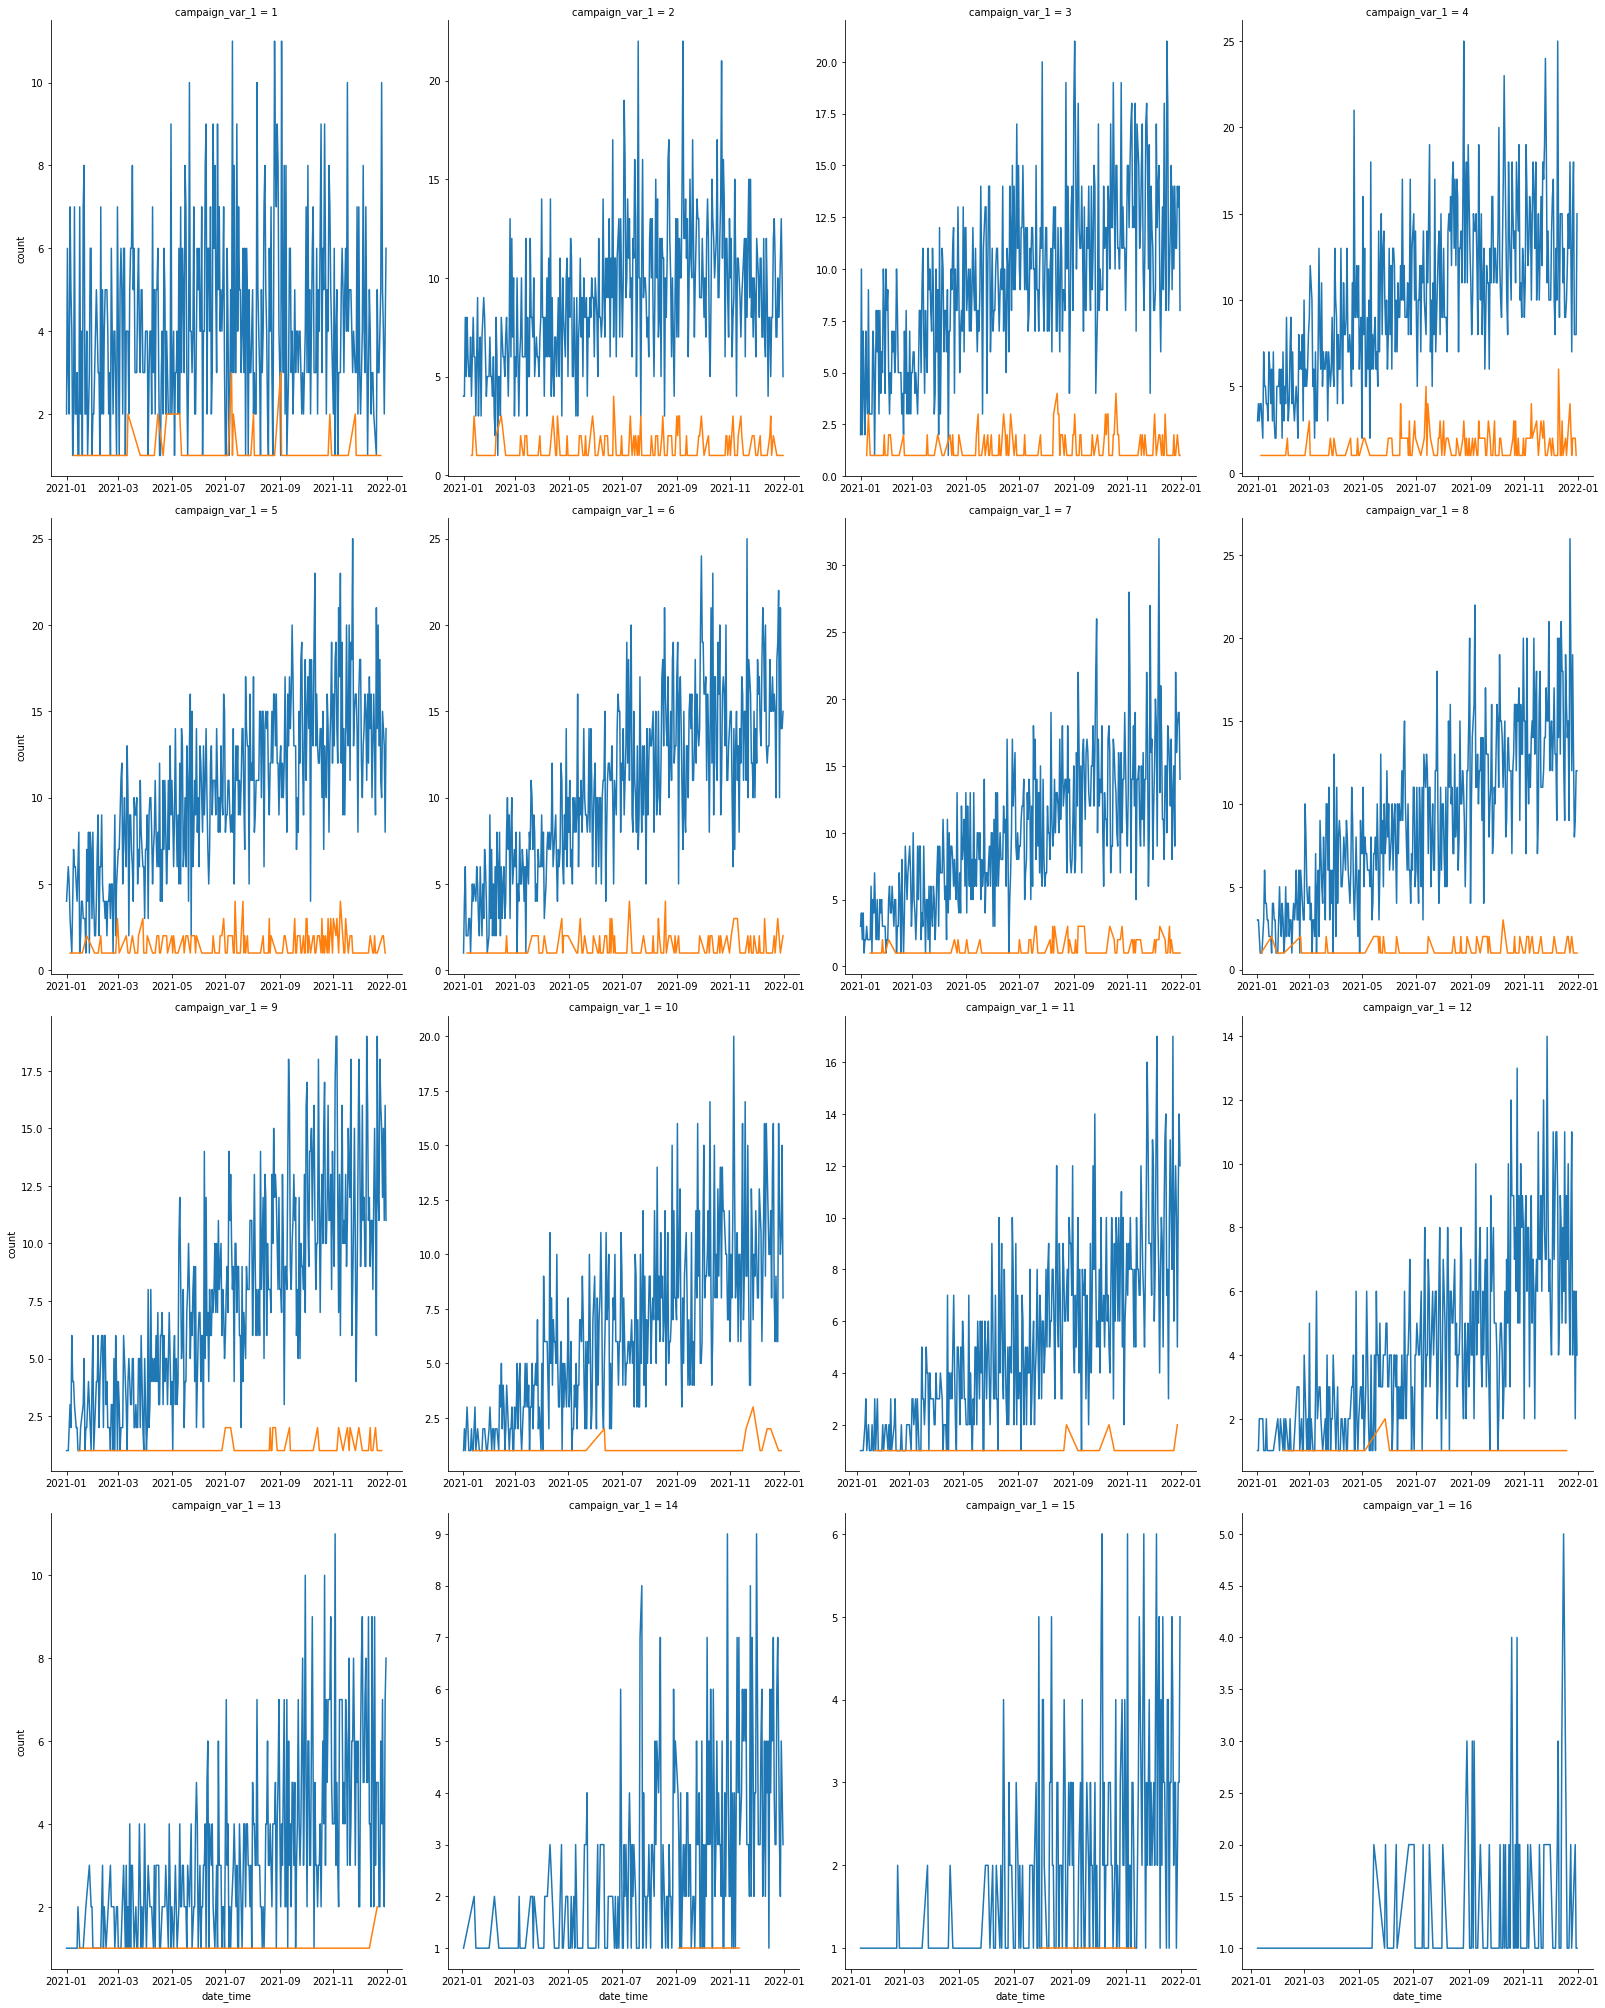

In [25]:
g = sns.FacetGrid(train.groupby(['date_time','campaign_var_1','buy'])['buy'].agg({'count'}).reset_index(),
                  col="campaign_var_1", col_wrap=4,hue="buy",height=7, aspect=.8,sharex=False,sharey=False);
g.map_dataframe(sns.lineplot, x="date_time", y="count");

### Let's see how users' interest in the product on the website changes over time based on the lead created date and type 2 campaign.

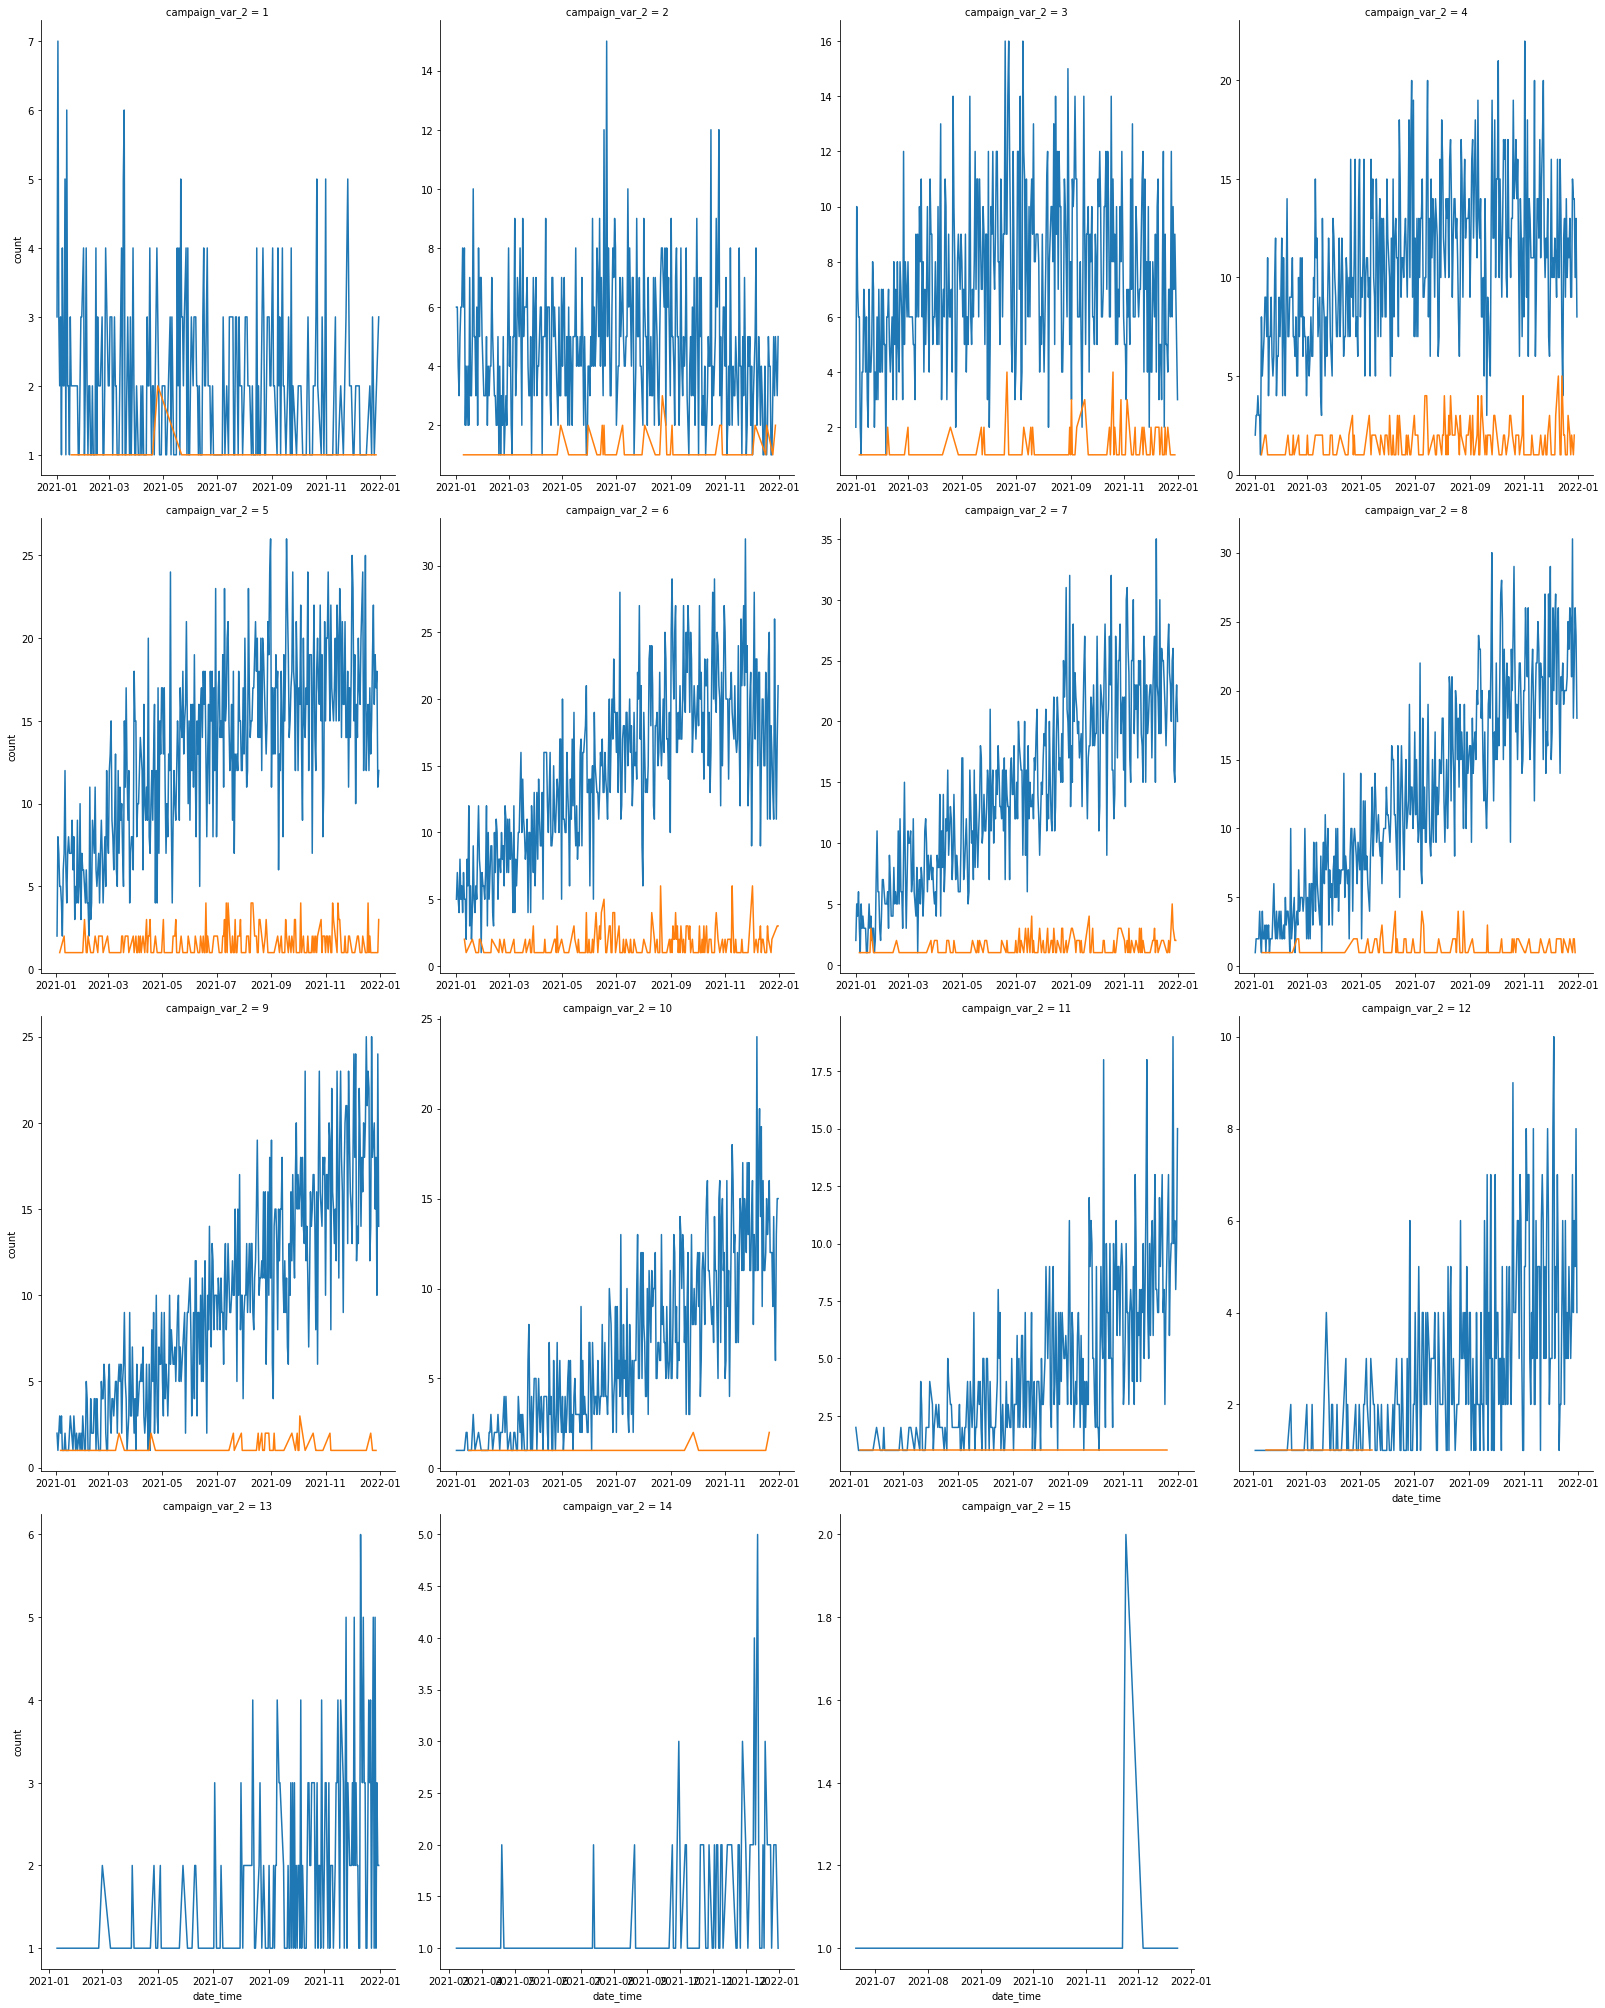

In [24]:
g = sns.FacetGrid(train.groupby(['date_time','campaign_var_2','buy'])['buy'].agg({'count'}).reset_index(),
                  col="campaign_var_2", col_wrap=4,hue="buy",height=7, aspect=.8,sharex=False,sharey=False);
g.map_dataframe(sns.lineplot, x="date_time", y="count");

### Let's see how users' interest changes over time based on the lead created time and the number of products purchased at the time of creating the leads.

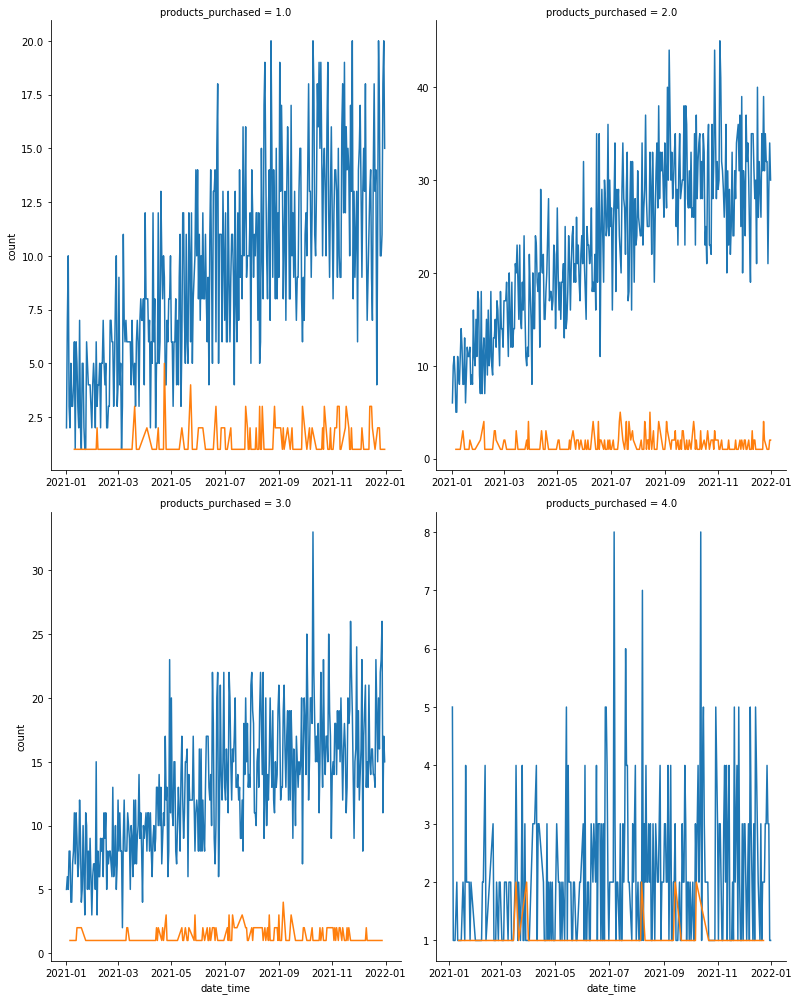

In [26]:
g = sns.FacetGrid(train.groupby(['date_time','products_purchased','buy'])['buy'].agg({'count'}).reset_index(),
                  col="products_purchased", col_wrap=2,hue="buy",height=7, aspect=.8,sharex=False,sharey=False);
g.map_dataframe(sns.lineplot, x="date_time", y="count");

### Let's see various user's activities on the website and how interest changes over time based on the lead creation time.

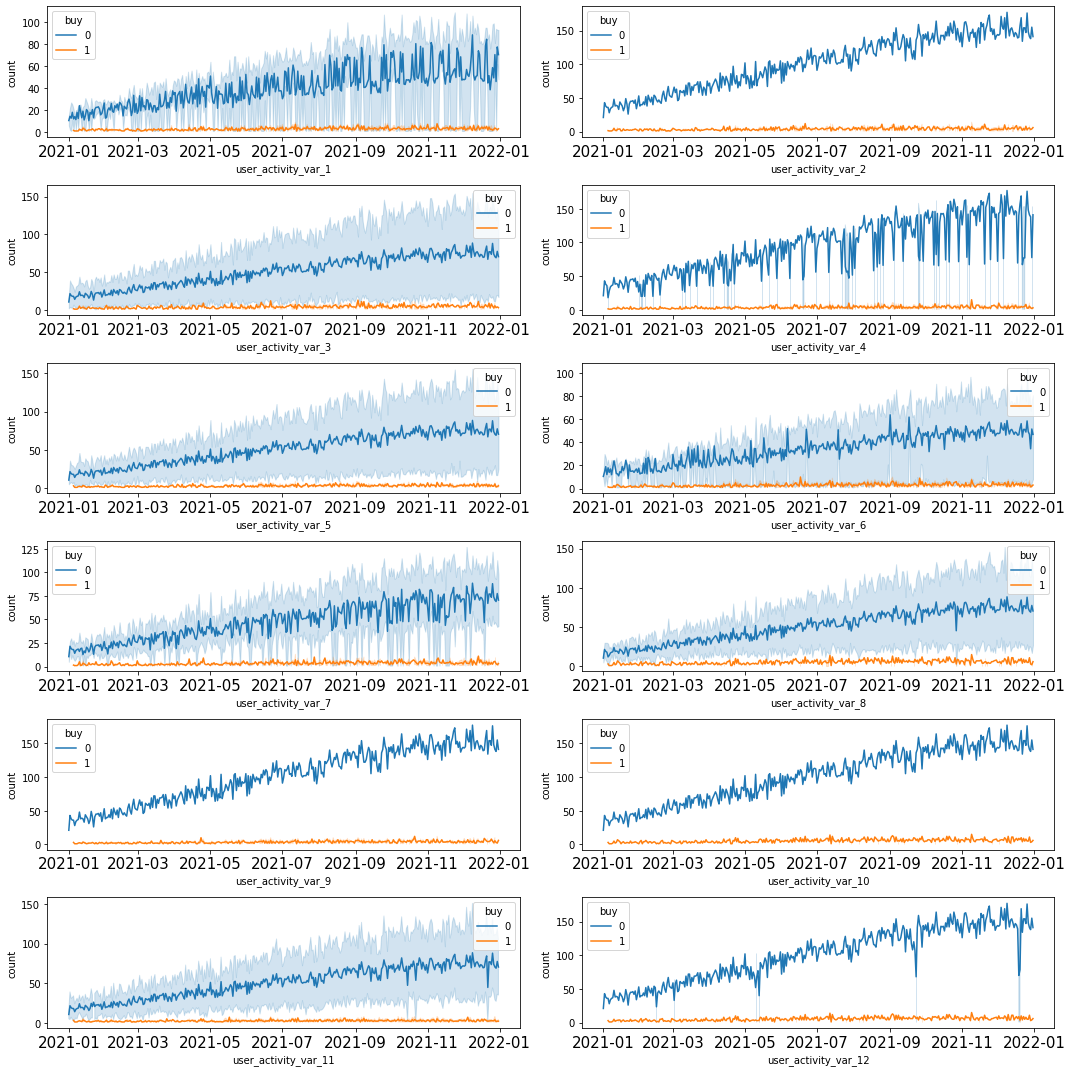

In [28]:
fig=plt.subplots(figsize=(15, 15))
for i,col  in enumerate(train.iloc[:,6:18].columns.values):    
  _=plt.subplot(6,2,i+1)
  df=train.groupby([col,'date_time','buy'])['buy'].agg({'count'}).reset_index()
  _=sns.lineplot(x=df['date_time'] ,y=df['count'],hue=df['buy'])
  #_=plt.title(col.capitalize()+' Distribution',fontsize=15)
  _=plt.xlabel(col,fontsize=10)
  _=plt.xticks(fontsize=15)
  _=plt.tight_layout()  
plt.show()  